In [1]:
# Removing the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing liberarys
import numpy as np, pandas as pd
import seaborn as sns,matplotlib.pyplot as plt

In [3]:
# read the data
df=pd.read_csv('student_scores%20-%20student_scores.csv',)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### EDA

[]

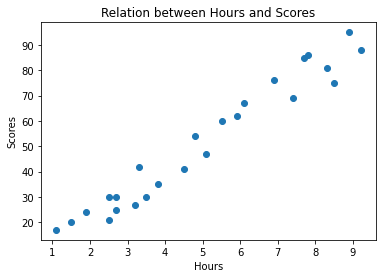

In [7]:
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title("Relation between Hours and Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.plot()

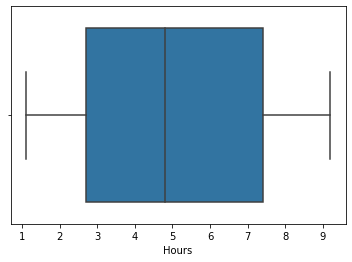

In [8]:
sns.boxplot('Hours',data=df)
plt.show()

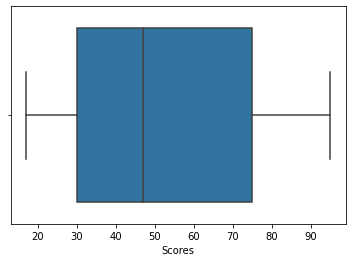

In [9]:
sns.boxplot('Scores',data=df)
plt.show()

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


[]

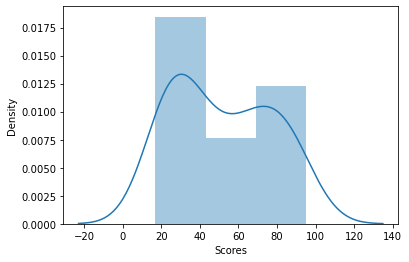

In [10]:
sns.distplot(df["Scores"])
plt.plot()

## Modeling

In [11]:
X = df.drop(["Scores"],axis=1) 
y = df.Scores

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

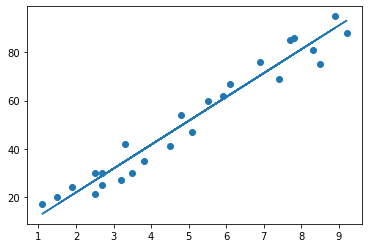

In [16]:
# Plotting for the test data
line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
model.score(X_train,y_train)

0.9515510725211552

In [18]:
model.score(X_test,y_test)

0.9454906892105356

In [19]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [21]:
# You can also test with your own data
hours = 9.25
pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
